# Preliminary Statistical Analysis Notebook

In [1]:
import pandas as pd
import os
import json
import numpy as np
import unidecode
from tqdm import tqdm
from music21 import *
import editdistance
import pickle
import seaborn as sns 
import matplotlib.pyplot as plt

## How are the poetic forms distributed in the dataset ? 

In [3]:
poetic_forms = {}

for filename in os.listdir('outputs/'):
    if filename.endswith('.txt'):
        name = os.path.join('/Users/Morgan/Desktop/UPF/musicology/outputs', filename)
        with open(name, "rb") as fp:   
            b = pickle.load(fp)

        
        
    for i in range(len(b)):
        if len(b[i])>4:
            form = b[i][-1]
            if form == 'birūālatin':
                form = 'birūlatin'
            if form not in poetic_forms.keys():
                poetic_forms[form] = 1
            else:
                poetic_forms[form] += 1

In [4]:
poetic_forms

{'zajal': 534,
 'qaṣīdah': 153,
 'tawshīḥ': 233,
 'unidentified': 63,
 'birūlatin': 21}

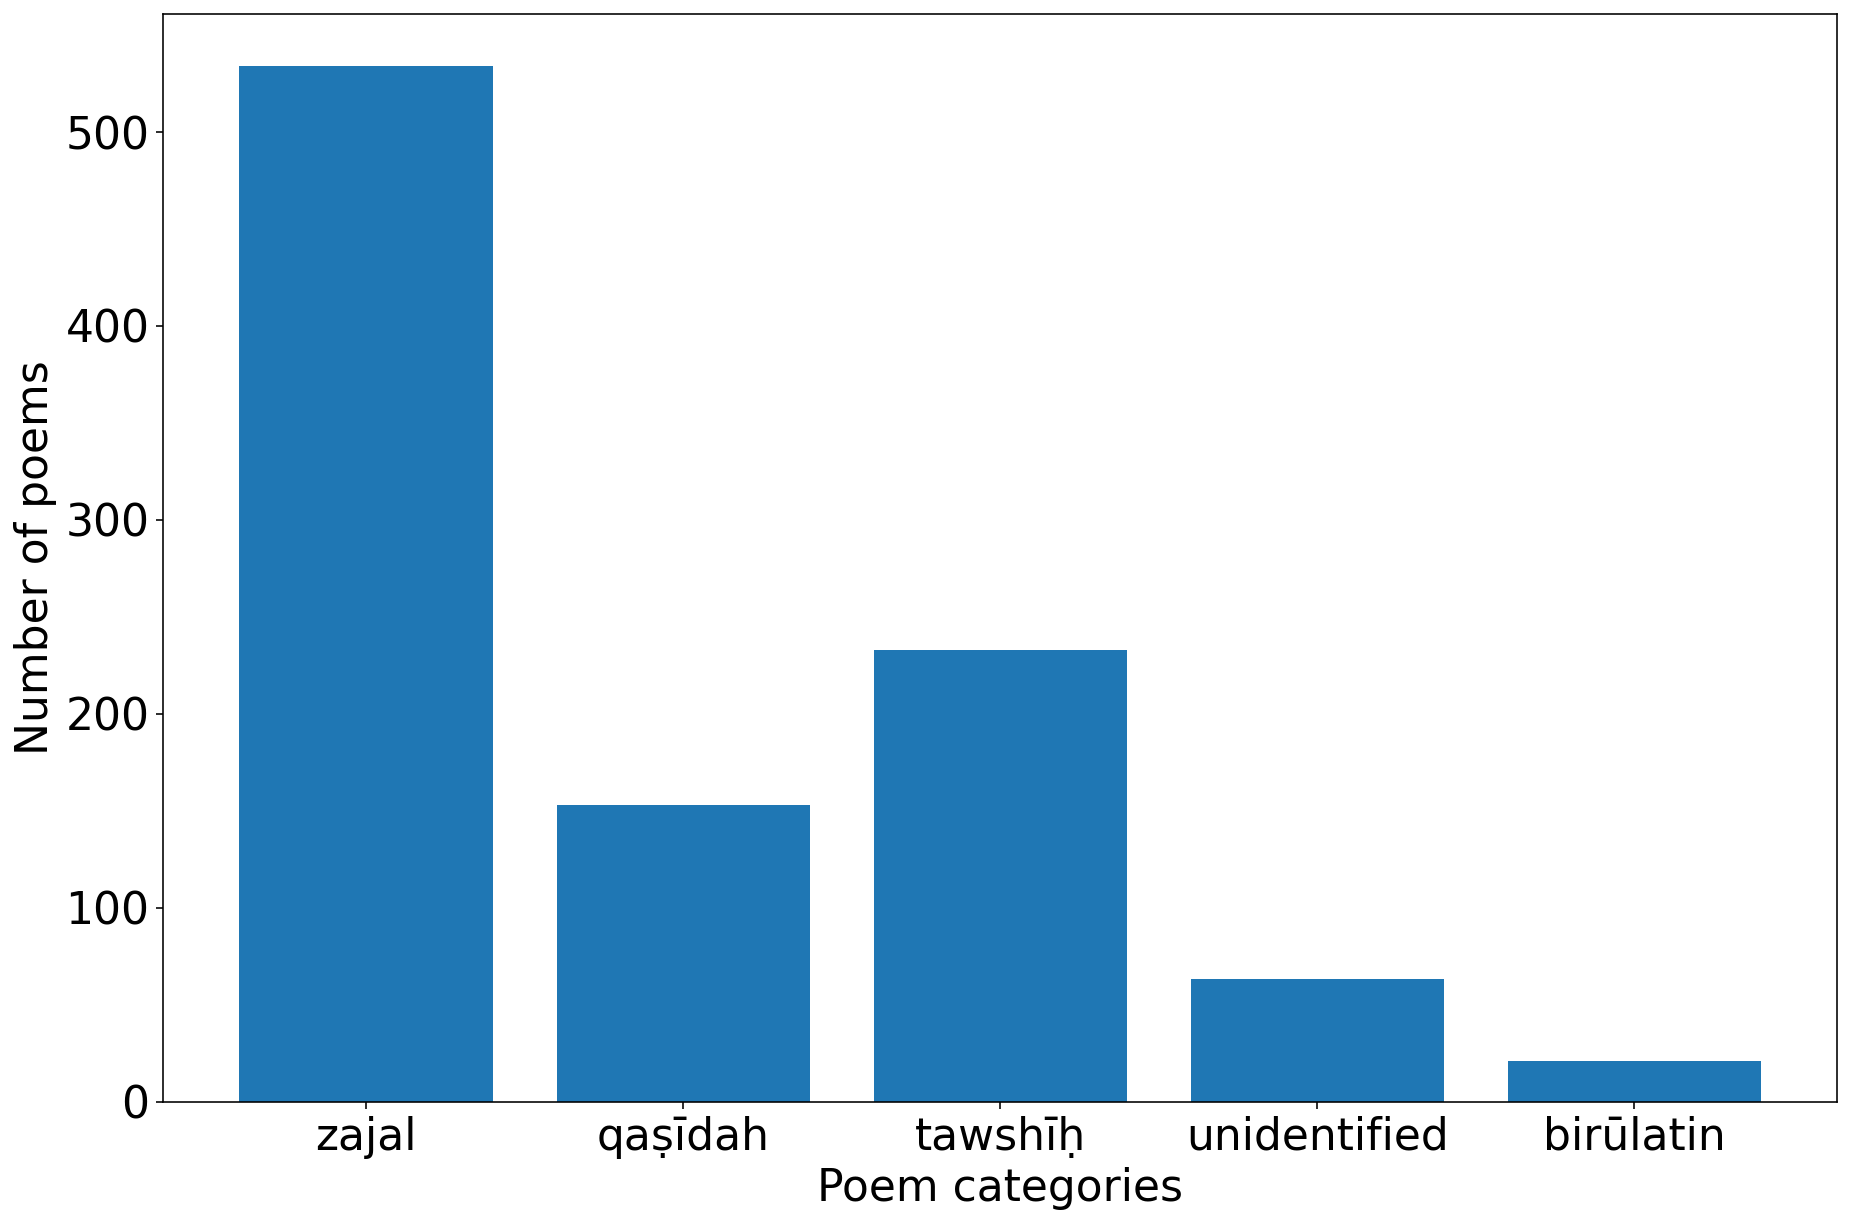

In [11]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(15,10))
labels, values = zip(*poetic_forms.items())
plt.bar(labels, values)
plt.xlabel('Poem categories')
plt.ylabel('Number of poems')
plt.savefig('Poems_distribution.png',dpi=300)

## In each nawba, how is each poetic form distributed ? Any correlations ?

In [7]:
poems_nawba = {}
poem = 0

for filename in os.listdir('outputs/'):
    if filename.endswith('.txt'):
        poem +=1 
        name = os.path.join('/Users/Morgan/Desktop/UPF/musicology.nosync/outputs', filename)
        with open(name, "rb") as fp:   
            b = pickle.load(fp)
    poetic_forms_per_nawba = [0,0,0,0,0]
    for i in range(len(b)):
        if len(b[i])>4:
            form = b[i][-1]
            if isinstance(form, str):
                if form == 'zajal':
                    poetic_forms_per_nawba[0]+=1
                elif form == 'qaṣīdah':
                    poetic_forms_per_nawba[1]+=1
                elif form == 'tawshīḥ':
                    poetic_forms_per_nawba[2]+=1
                elif form == 'unidentified':
                    poetic_forms_per_nawba[3]+=1
                elif form == 'birūlatin':
                     poetic_forms_per_nawba[4]+=1
                elif form == 'birūālatin':
                    poetic_forms_per_nawba[4]+=1
    poems_nawba[poem] = poetic_forms_per_nawba

In [8]:
total = []
for i in poems_nawba.keys():
    total.append(poems_nawba[i])
    
X = np.asarray(total)

corr = np.corrcoef(X.T)

plt.figure(figsize=(10,10))
#plt.title('Poetic Forms Correlation Map')
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
labels = ['zajal', 'qaṣīdah', 'tawshīḥ', 'unidentified', 'birūlatin']
sns.heatmap(corr, mask=mask, xticklabels =labels, yticklabels = labels,cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('Poems_correlation.png',dpi=300)